***----------------------------------------------WEEK:2 - TASK 02 [ HEART-DISEASE-PREDICTION ]----------------------------------------------***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Q1.Load the dataset using pd.read csv. **






In [ ]:
df = pd.read_csv("heart-disease.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


How many rows and columns are in the dataset?

In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Number of rows: 303
Number of columns: 14


List the column names.

In [ ]:
columns = [col for col in df.columns]
print(columns)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Q2. Check for missing values.**

Answer: No missing value found

**Why is it significant that this dataset has no missing values?**


Simplifies preprocessing – No need for imputation or row removal.

Preserves data integrity – Full dataset is used for training.

Improves model performance – Models work better with complete data.

Ensures reliable results – No bias from handling missing values.

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Q3. Analyze the correlation matrix using df.corr()**

**Identify the top three features correlated with the target.**

feature:
cp	         --       +0.4338
thalach	     --       +0.4217
slope	       --       +0.3459

**Explanation of Their Importance**

cp (chest pain type) – Positive correlation (+0.43)

Certain chest pain types (especially type 1: typical angina) are more strongly associated with heart disease.

Strong predictor, especially because it's a categorical variable with clinical significance.

thalach (maximum heart rate achieved) – Positive correlation (+0.42)

Lower max heart rate can indicate poor heart function.

Higher values often appear in healthier individuals, hence the positive correlation with the target (1 = presence of heart disease).

slope (slope of the ST segment) – Positive correlation (+0.35)

Represents the slope of peak exercise ST segment. A flat or down-sloping ST is often seen in heart disease patients.

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
df['age'].value_counts()

,count
age,
58,19
57,17
54,16
59,14
52,13
51,12
62,11
44,11
56,11


In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


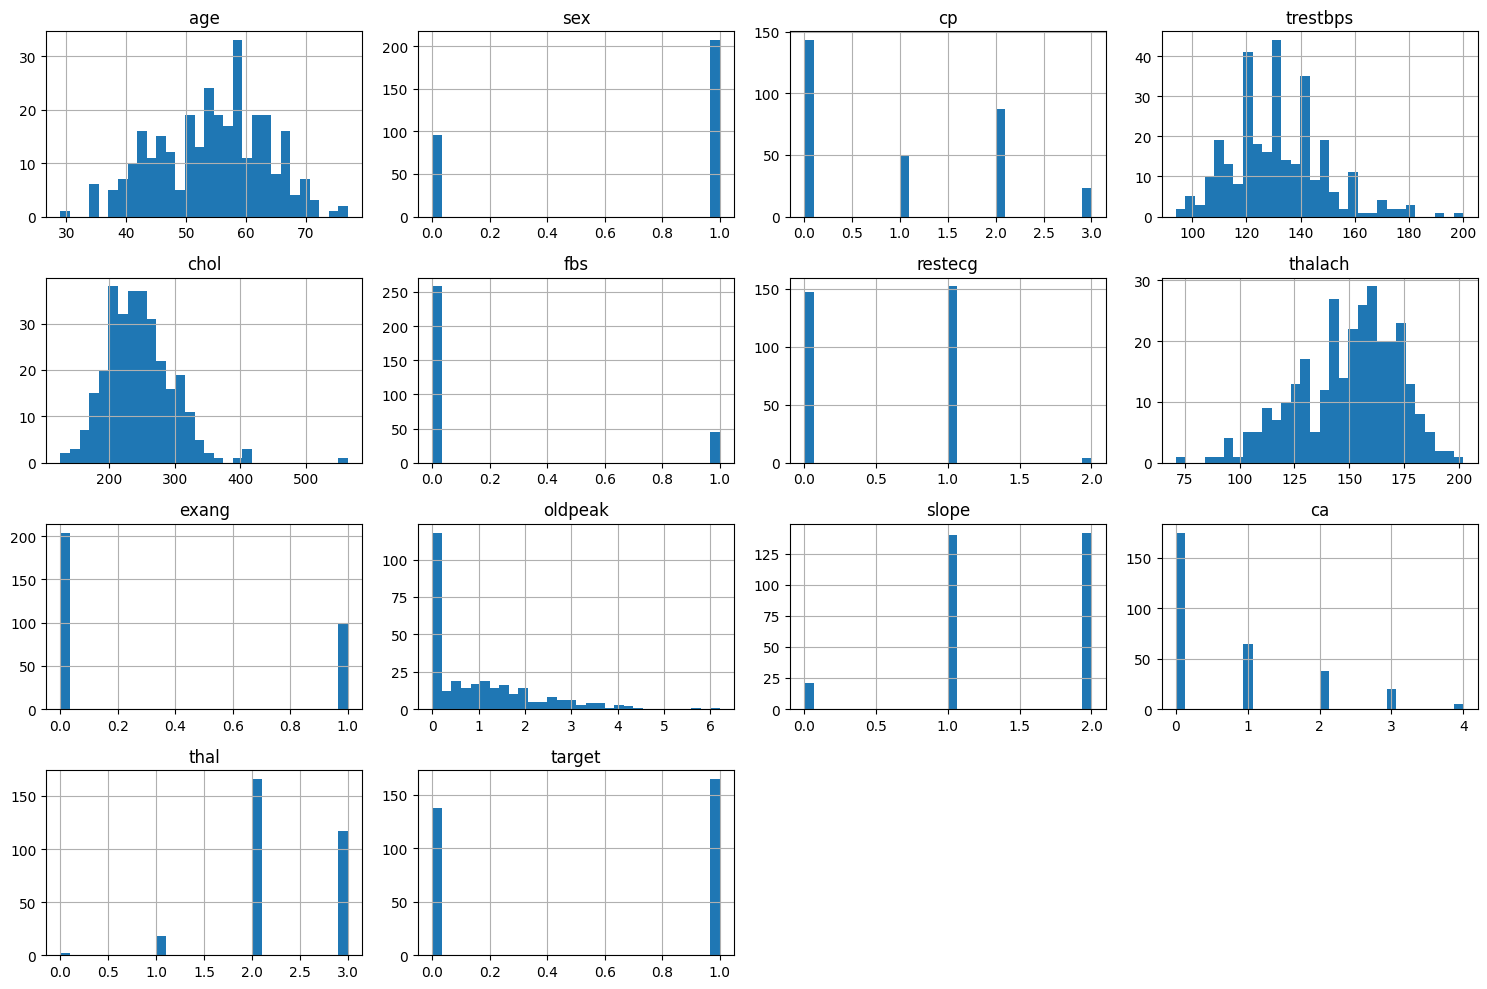

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

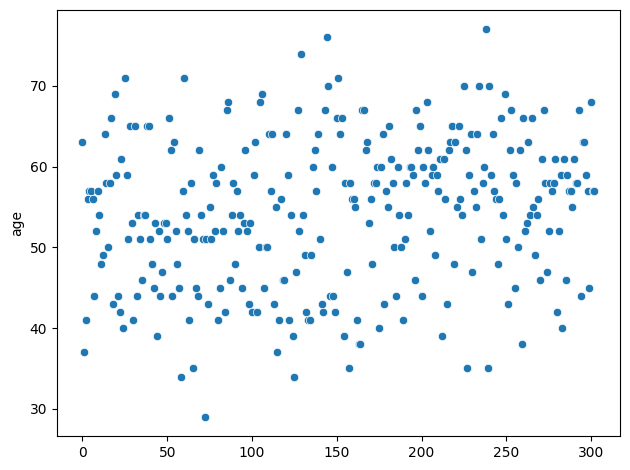

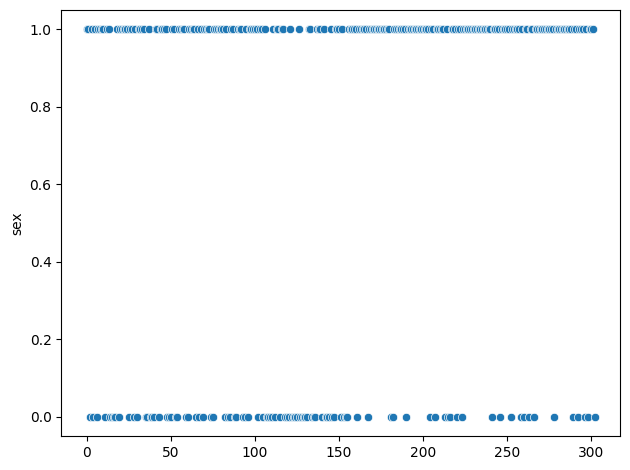

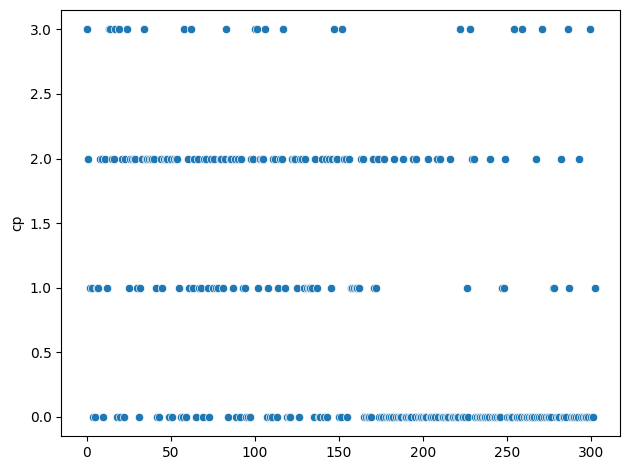

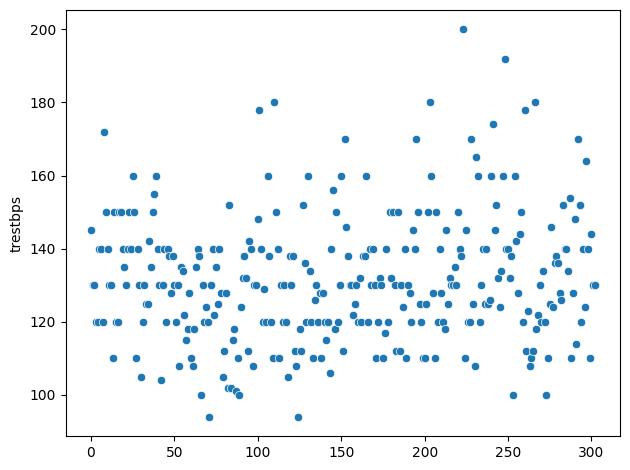

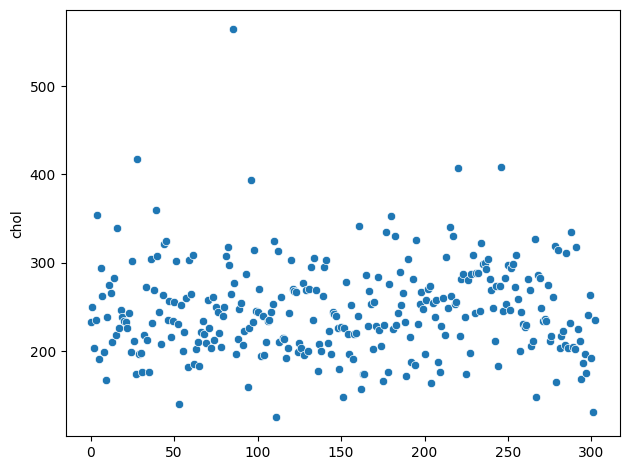

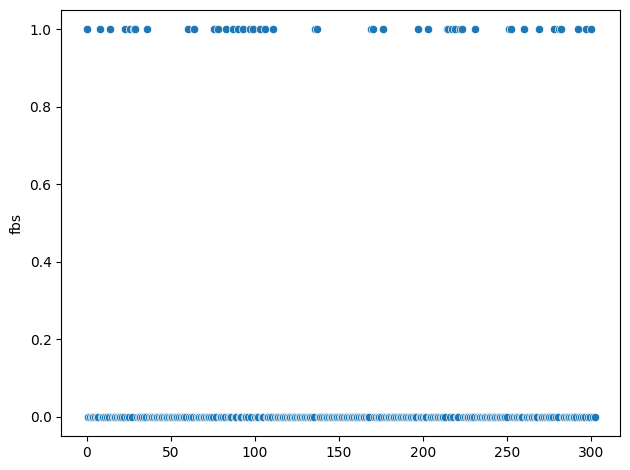

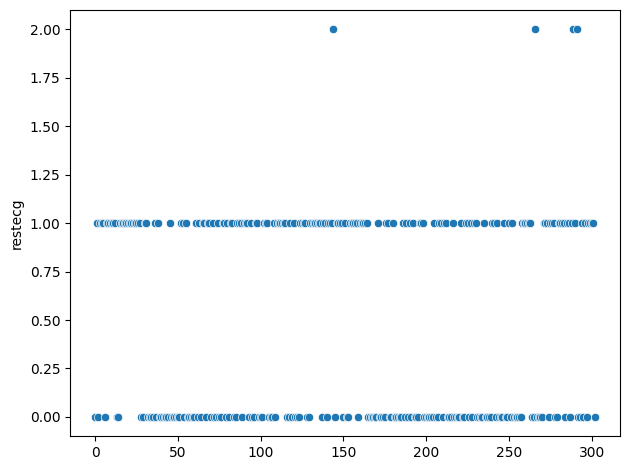

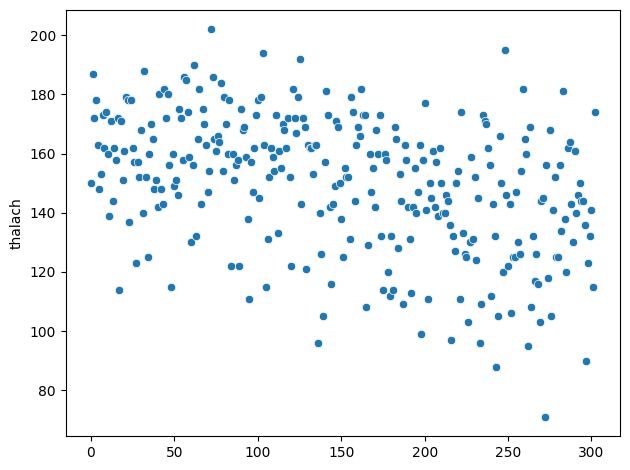

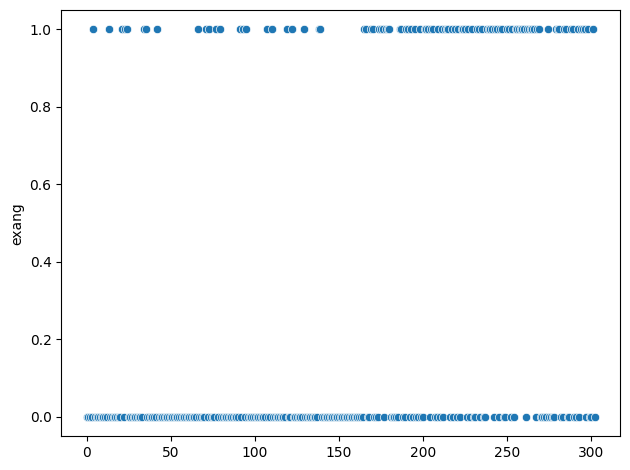

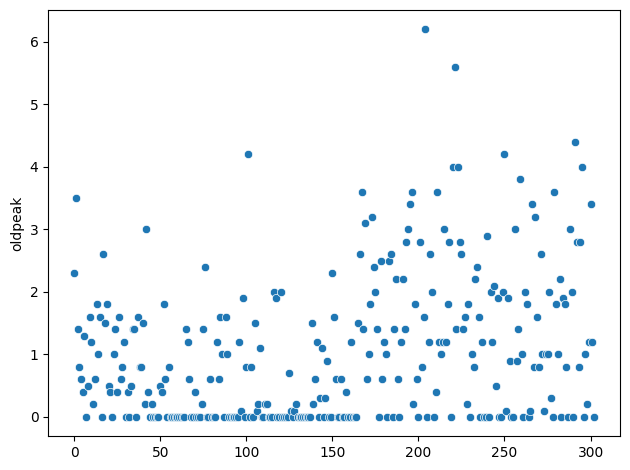

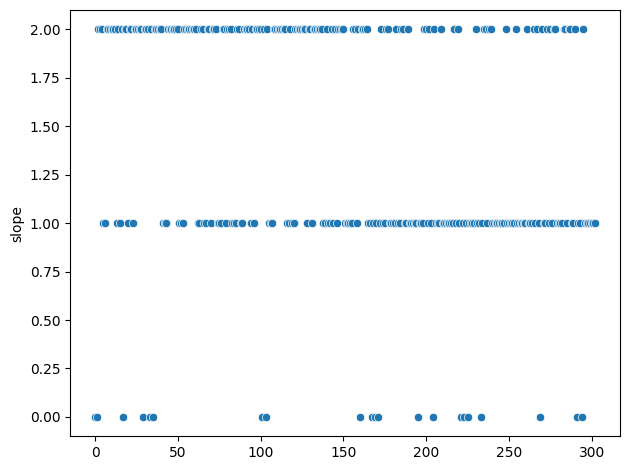

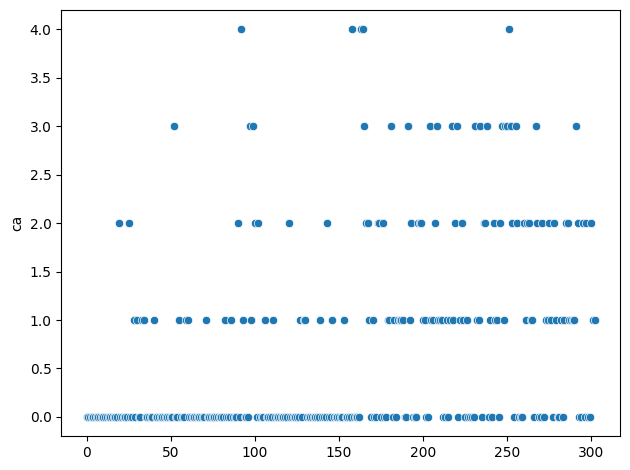

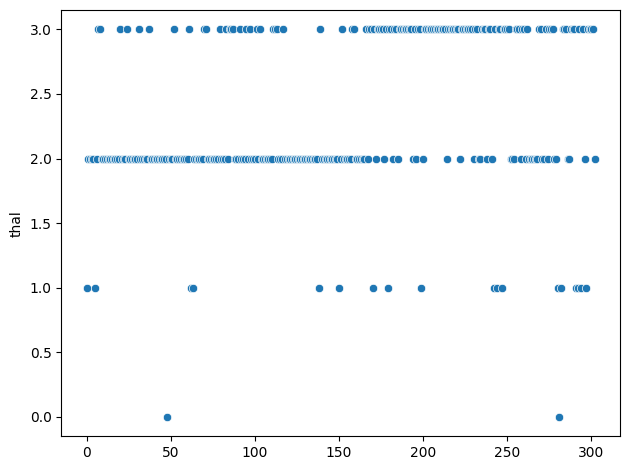

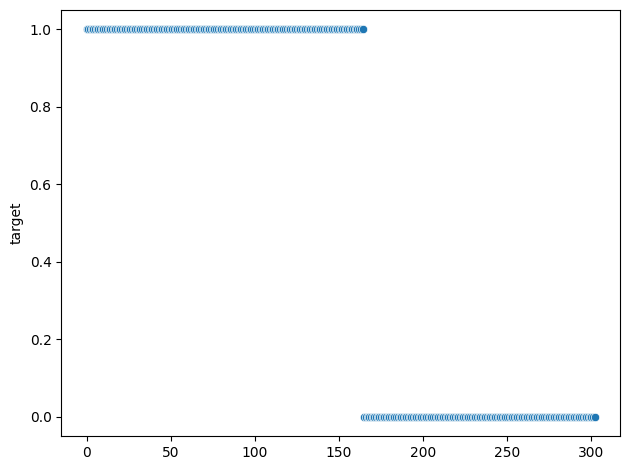

In [ ]:
for col in df.columns:
  sns.scatterplot(df[col])
  plt.tight_layout()
  plt.show()

In [1]:
# sns.histplot(df['age'])

In [2]:
# sns.histplot(df['cp'])


In [3]:
# sns.histplot(df['trestbps'])

In [4]:
# sns.scatterplot(df['chol'])

In [5]:
# sns.histplot(df['chol'])

<Axes: xlabel='target', ylabel='chol'>

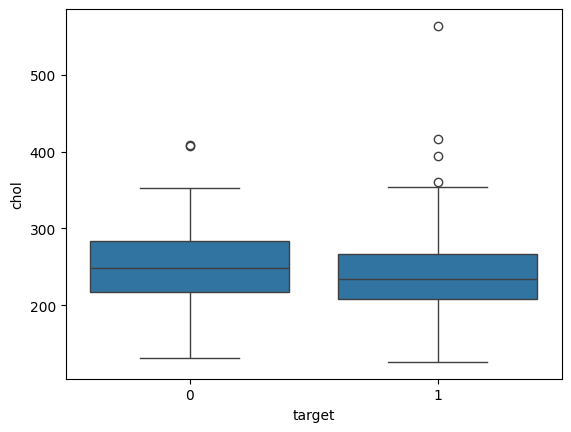

In [ ]:
sns.boxplot(x='target', y='chol', data=df)


<Axes: ylabel='chol'>

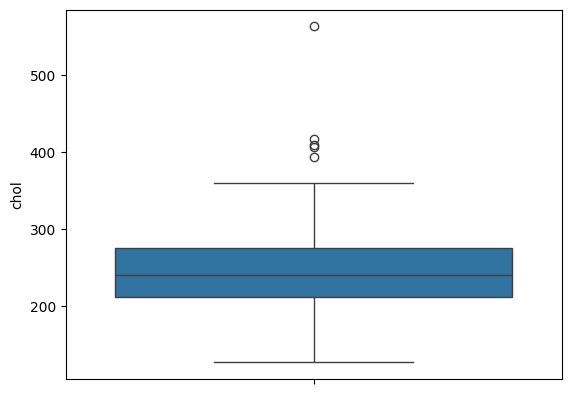

In [ ]:
sns.boxplot(df['chol'])

<Axes: xlabel='fbs', ylabel='Count'>

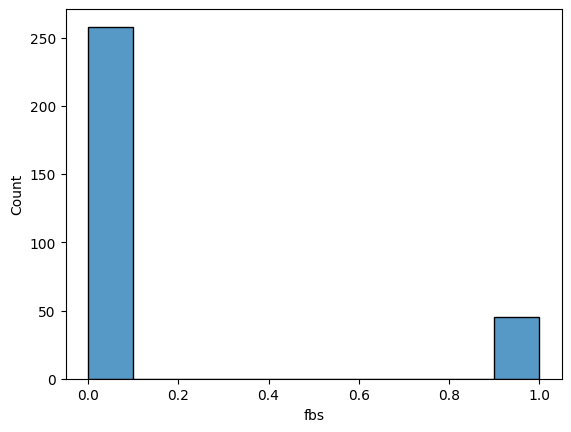

In [ ]:
sns.histplot(df['fbs'])

<Axes: xlabel='restecg', ylabel='Count'>

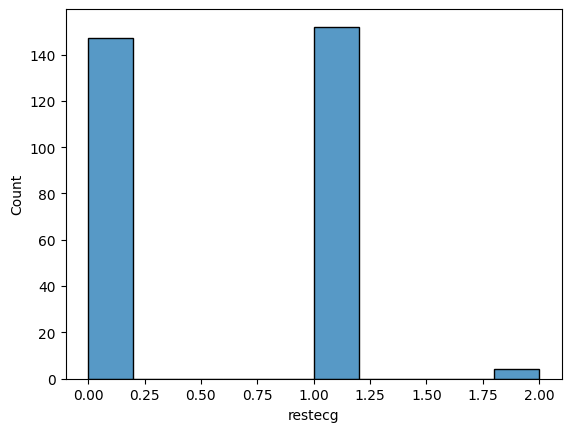

In [ ]:
sns.histplot(df['restecg'])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='thalach', ylabel='Count'>

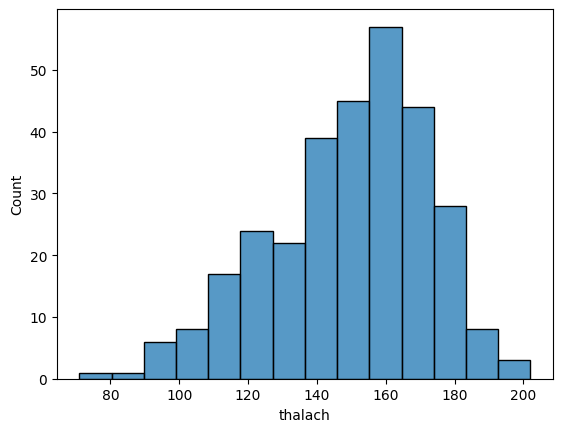

In [ ]:
sns.histplot(df['thalach'])

<Axes: xlabel='exang', ylabel='Count'>

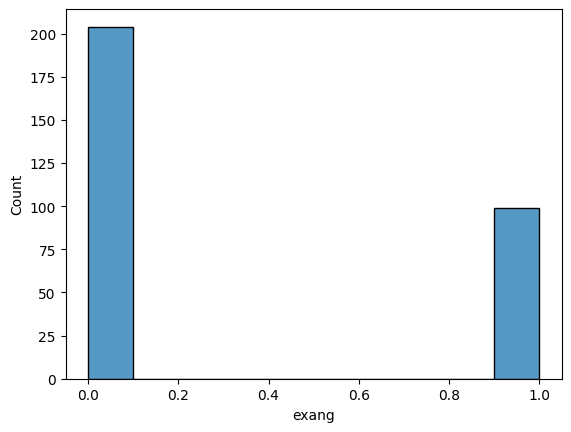

In [ ]:
sns.histplot(df['exang'])

<Axes: xlabel='target', ylabel='age'>

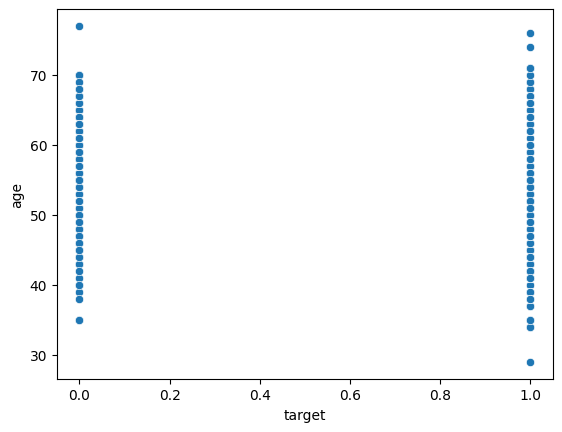

In [ ]:
sns.scatterplot(x=df['target'],y=df['age'])

<Axes: xlabel='oldpeak', ylabel='Count'>

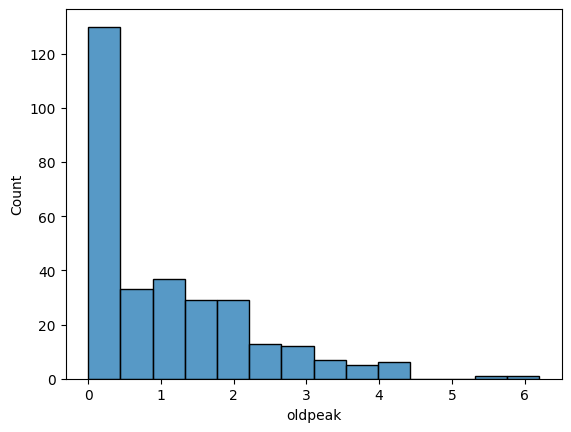

In [ ]:
sns.histplot(df['oldpeak'])

<Axes: ylabel='oldpeak'>

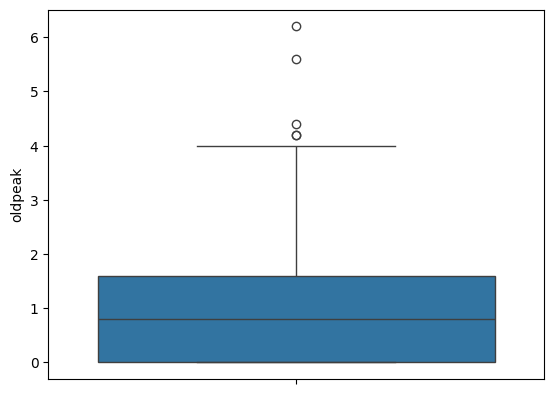

In [ ]:
sns.boxplot(df['oldpeak'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report,roc_auc_score,recall_score

In [ ]:
X = df.drop(columns=['target'],axis=1)
y = df['target']

**Q4. Split the dataset into training (80%) and validation (20%) sets. What are the sizes of these
sets?**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, y_train.shape

((242, 13), (242,))

In [ ]:
X_test.shape,y_test.shape

((61, 13), (61,))

Applying Standard Scaler on X_train and X_test

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


Models declaration

In [ ]:
# Fit models
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42)



LogisticRegression()

In [ ]:

lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:

knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
coefficients = lr.coef_[[0]]
print(coefficients)

[[-0.08559141 -0.78308552  0.81790363 -0.27330685 -0.17484121  0.09031166
   0.28417893  0.39513087 -0.51758388 -0.68139635  0.43530168 -0.78995525
  -0.56565853]]


**Q.5 Train a logistic regression model**

Accuracy:
0.8524590163934426

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:


Text(0.5, 23.52222222222222, 'Predicted')

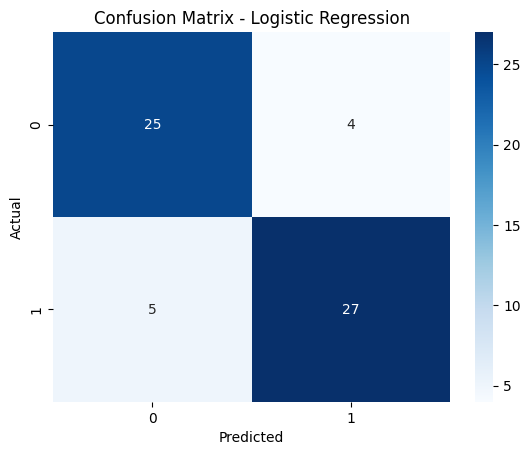

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test_scaled)


print("Accuracy:")
acc_lr = accuracy_score(y_test, y_pred_lr)
print(acc_lr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
precision = precision_score(y_test,y_pred_lr)
recall = recall_score(y_test,y_pred_lr)
f1_score = f1_score(y_test,y_pred_lr)

print(f"precision  -  {precision}")
print(f"recall  -  {recall}")
print(f"f1_score  -  {f1_score}")

precision  -  0.8709677419354839
recall  -  0.84375
f1_score  -  0.8571428571428571


**Q9. Perform 5-fold cross-validation for the logistic regression model. Report the mean accuracy, precision, recall, and F1-score.**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# # # Re-scale the full dataset if not already done
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)  # Use full feature set for CV

# Define model
lr = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
cv_results = cross_validate(
    lr, X_train_scaled, y_train, cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Print mean scores
print("5-Fold Cross-Validation (Logistic Regression):")
print(f"Accuracy : {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Recall   : {np.mean(cv_results['test_recall']):.4f}")
print(f"F1-score : {np.mean(cv_results['test_f1']):.4f}")


5-Fold Cross-Validation (Logistic Regression):
Accuracy : 0.8180
Precision: 0.8273
Recall   : 0.8493
F1-score : 0.8361


**Visualize feature importance for the logistic regression model. Which feature has the
highest impact, and why might this be significant?**


10. FEATURE IMPORTANCE FOR LOGISTIC REGRESSION:
Feature Importance (by absolute coefficient value):
     Feature  Importance
2         cp    0.817904
11        ca    0.789955
1        sex    0.783086
9    oldpeak    0.681396
12      thal    0.565659
8      exang    0.517584
10     slope    0.435302
7    thalach    0.395131
6    restecg    0.284179
3   trestbps    0.273307
4       chol    0.174841
5        fbs    0.090312
0        age    0.085591

Most important feature: cp

Why 'cp' might be significant:
- Chest pain type - different types indicate different cardiac conditions


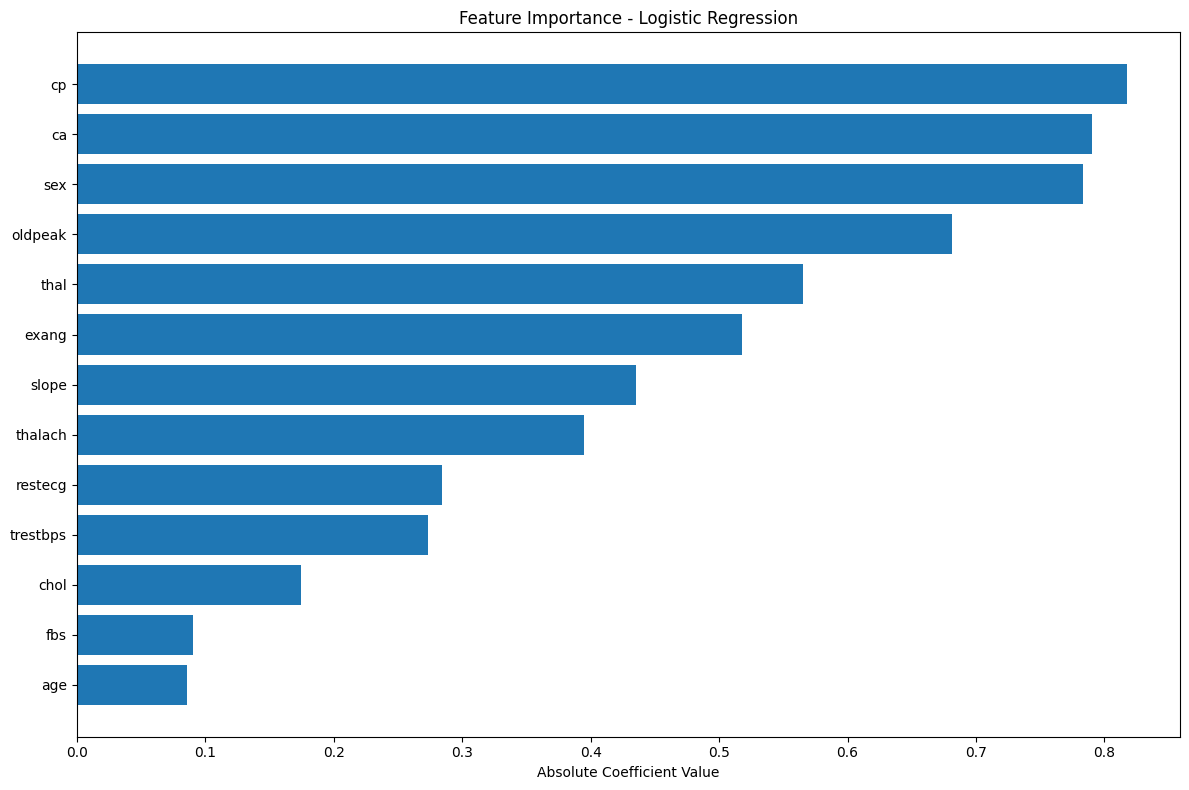

In [ ]:
print("\n10. FEATURE IMPORTANCE FOR LOGISTIC REGRESSION:")

# Get feature importance (coefficients)
feature_importance = abs(lr.coef_[0])
feature_names = X.columns

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance (by absolute coefficient value):")
print(importance_df)

# Find most important feature
most_important_feature = importance_df.iloc[0]['Feature']
print(f"\nMost important feature: {most_important_feature}")

# Feature importance explanation
feature_explanations = {
    'cp': 'Chest pain type - different types indicate different cardiac conditions',
    'thalach': 'Maximum heart rate achieved - lower rates may indicate cardiac issues',
    'exang': 'Exercise-induced angina - chest pain during exercise is a key symptom',
    'oldpeak': 'ST depression induced by exercise - indicates cardiac stress',
    'ca': 'Number of major vessels colored by fluoroscopy - shows blood flow',
    'thal': 'Thalassemia - blood disorder affecting oxygen transport',
    'slope': 'Slope of peak exercise ST segment - indicates cardiac response',
    'sex': 'Gender - men have higher risk of heart disease',
    'age': 'Age - older age increases risk',
    'trestbps': 'Resting blood pressure - high BP is a risk factor',
    'chol': 'Serum cholesterol - high cholesterol increases risk',
    'fbs': 'Fasting blood sugar - diabetes indicator',
    'restecg': 'Resting electrocardiographic results - shows heart rhythm'
}

print(f"\nWhy '{most_important_feature}' might be significant:")
if most_important_feature in feature_explanations:
    print(f"- {feature_explanations[most_important_feature]}")
else:
    print("- This feature shows strong correlation with heart disease presence")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Accuracy:
0.9016393442622951

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:


Text(0.5, 23.52222222222222, 'Predicted')

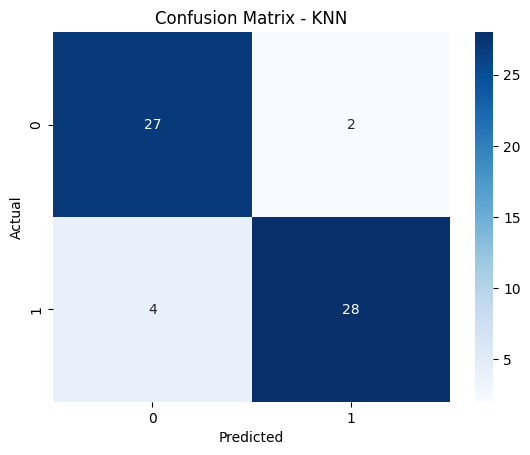

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)


print("Accuracy:")
acc_knn = accuracy_score(y_test, y_pred_knn)
print(acc_knn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')






Accuracy:
0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:


Text(0.5, 23.52222222222222, 'Predicted')

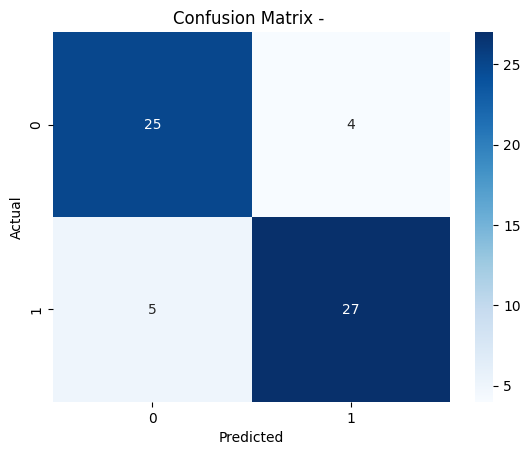

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)



print("Accuracy:")
acc_rf = accuracy_score(y_test, y_pred_rf)
print(acc_rf)


print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ')
plt.ylabel('Actual')
plt.xlabel('Predicted')



**Q6. Compare the accuracy of logistic regression, KNN, and Random Forest models. Which
model performed best, and why?**

KNN Performed Best Because
It’s a non-parametric model, good at capturing complex relationships if the dataset has clear local patterns.

**Might worked well because:**

Features are well scaled (used StandardScaler).

There's not much noise or too many irrelevant features.

Performs better when the data is not too large and not too high-dimensional.

In [ ]:
accuracies = {'Logistic Regression':acc_lr,'KNN':acc_knn,'Random Forest':acc_rf}

for model, acc in accuracies.items():
    print(f"{model}: Accuracy = {acc:.4f}")

best_model = max(accuracies, key=accuracies.get)
print(f"\nBest performing model: {best_model} with accuracy = {accuracies[best_model]:.4f}")


Logistic Regression: Accuracy = 0.8525
KNN: Accuracy = 0.9016
Random Forest: Accuracy = 0.8361

Best performing model: KNN with accuracy = 0.9016


**Q7. Perform hyperparameter tuning for KNN. Plot train and test scores. What is the optimal
number of neighbors?**

Optimal Number of neighbors is 7

7. HYPERPARAMETER TUNING FOR KNN:
Optimal number of neighbors: 7
Best test accuracy: 0.9180


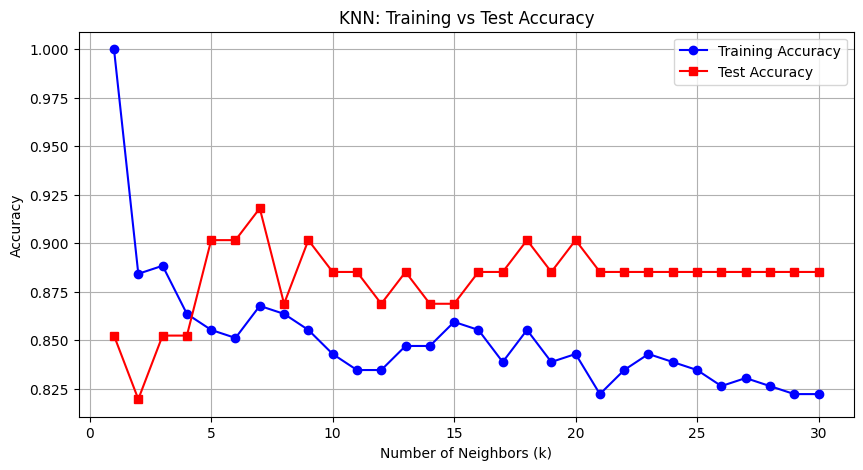

Accuracy: 0.9180327868852459

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:


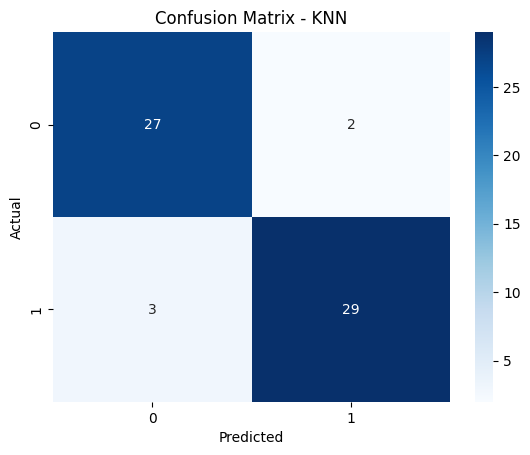

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("7. HYPERPARAMETER TUNING FOR KNN:")

# Range of k values to test
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Find optimal k
optimal_k = k_range[np.argmax(test_scores)]
print(f"Optimal number of neighbors: {optimal_k}")
print(f"Best test accuracy: {max(test_scores):.4f}")

# Plot training and test scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_scores, 'b-', marker='o', label='Training Accuracy')
plt.plot(k_range, test_scores, 'r-', marker='s', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Training vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Train final model with optimal k
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn_hpt = best_knn.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn_hpt))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_hpt))

# Confusion Matrix
print("Confusion Matrix:")
cm_knn_1 = confusion_matrix(y_test, y_pred_knn_hpt)
sns.heatmap(cm_knn_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import joblib

In [ ]:

# Saving models
joblib.dump(lr, 'logistic_model.joblib')
joblib.dump(rf, 'random_forest_model.joblib')
joblib.dump(knn, 'knn_model.joblib')

# Save scaler
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']